In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 95% 141M/149M [00:02<00:00, 78.7MB/s]
100% 149M/149M [00:02<00:00, 67.0MB/s]


In [ ]:
!unzip /content/brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [ ]:
# Importing necessary libraries
import os  # For interacting with the operating system (file handling)
import cv2  # OpenCV for image processing
import numpy as np  # For numerical operations on arrays
from skimage.feature import hog, local_binary_pattern  # Feature extraction methods
from skimage.color import rgb2gray  # To convert images from RGB to grayscale
from sklearn.preprocessing import LabelEncoder  # To encode target labels with numerical values
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve  # Metrics to evaluate model performance
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
import matplotlib.pyplot as plt  # For plotting graphs
import tensorflow as tf  # TensorFlow for building deep learning models
from tensorflow.keras import layers, models  # Keras layers and models for neural networks
from tensorflow.keras.applications import MobileNet  # Pre-trained MobileNet model

# Function to load images from a folder
def load_images_from_folder(folder):
    images = []  # List to store the images
    labels = []  # List to store the labels (class names)

    # Iterate over each class folder in the main folder
    for class_folder in os.listdir(folder):
        class_path = os.path.join(folder, class_folder)  # Get the path for the class folder

        # Iterate over each image file in the class folder
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)  # Get the path for the image
            img = cv2.imread(img_path)  # Read the image using OpenCV

            # If the image is successfully loaded
            if img is not None:
                # Resize the image to 128x128 pixels
                img_resized = cv2.resize(img, (128, 128))
                images.append(img_resized)  # Append the resized image to the images list
                labels.append(class_folder)  # Append the class label to the labels list

    # Return the images and labels as NumPy arrays
    return np.array(images), np.array(labels)




In [ ]:
# Load training images and labels from the specified folder
train_images, train_labels = load_images_from_folder('/content/Training')

# Load testing images and labels from the specified folder
test_images, test_labels = load_images_from_folder('/content/Testing')


array([[[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [18, 18, 18]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [18, 18, 18]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [18, 18, 18]],

       ...,

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [18, 18, 18]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [18, 18, 18]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [18, 18, 18]]], dtype=uint8)
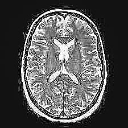

In [ ]:
train_images[2000]

In [ ]:
train_images

array([[[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 1,  1,  1],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 2,  2,  2],
         [ 2,  2,  2],
         [ 2,  2,  2],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        ...,

        [[ 2,  2,  2],
         [ 2,  2,  2],
         [ 2,  2,  2],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 1,  1,  1],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]]],


       [[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0, 

In [ ]:
train_labels[2000]

'notumor'

In [ ]:
train_labels

array(['glioma', 'glioma', 'glioma', ..., 'pituitary', 'pituitary',
       'pituitary'], dtype='<U10')

In [ ]:
train_labels

array(['glioma', 'glioma', 'glioma', ..., 'pituitary', 'pituitary',
       'pituitary'], dtype='<U10')

In [ ]:
# Initialize a label encoder to convert class labels to numerical form
le = LabelEncoder()

# Fit the label encoder on the training labels and transform them to numerical values
train_labels_enc = le.fit_transform(train_labels)

# Use the label encoder to transform the test labels as well
test_labels_enc = le.transform(test_labels)

In [ ]:
train_labels_enc

array([0, 0, 0, ..., 3, 3, 3])

**Part 1 Machine Learning**

**1.1 Extracting Histogram of Gradients(HOG) and Local Binary Patterns(LBP)**

In [ ]:
from skimage.feature import hog, local_binary_pattern
from skimage.color import rgb2gray
import numpy as np

# Function to extract HOG (Histogram of Oriented Gradients) features from images with reduced features
def extract_hog_features(images):
    hog_features = []  # List to store HOG features for all images

    # Loop over each image
    for img in images:
        gray_img = rgb2gray(img)  # Convert the image to grayscale (required for HOG)

        # Reduce the number of HOG features by increasing cell size and keeping block size
        features = hog(gray_img, pixels_per_cell=(32, 32), cells_per_block=(2, 2), visualize=False)

        hog_features.append(features)  # Append the extracted features to the list

    return np.array(hog_features)  # Return the HOG features as a NumPy array

# Function to extract LBP (Local Binary Pattern) features from images with reduced features
def extract_lbp_features(images):
    lbp_features = []  # List to store LBP features for all images

    # Loop over each image
    for img in images:
        gray_img = rgb2gray(img)  # Convert the image to grayscale (required for LBP)

        # Reduce LBP features by increasing the radius and reducing the number of bins
        lbp = local_binary_pattern(gray_img, P=8, R=2, method="uniform")

        # Calculate the histogram of the LBP pattern with fewer bins (e.g., 5 bins)
        (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 4), range=(0, 3))

        lbp_features.append(hist)  # Append the LBP histogram to the list

    return np.array(lbp_features)  # Return the LBP features as a NumPy array

# Extract HOG features for the training and testing images
hog_train = extract_hog_features(train_images)
hog_test = extract_hog_features(test_images)

# Extract LBP features for the training and testing images
lbp_train = extract_lbp_features(train_images)
lbp_test = extract_lbp_features(test_images)

# Combine HOG and LBP features into a single feature set for training
combined_train = np.hstack([hog_train, lbp_train])

# Combine HOG and LBP features into a single feature set for testing
combined_test = np.hstack([hog_test, lbp_test])


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Parameter grid for SVC
svc_param_grid = {
    'C': [0.1, 1, 10] # Regularization parameter
}

# Parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [10, 100,200],  # Number of trees
    'max_depth': [1,10, 20]  # Maximum depth of the tree
}

# Randomized Search for SVC
svc_random_search = RandomizedSearchCV(SVC(probability=True), svc_param_grid, n_iter=3, scoring='accuracy', cv=3, verbose=2, n_jobs=-1)
svc_random_search.fit(combined_train, train_labels_enc)

# Randomized Search for Random Forest
rf_random_search = RandomizedSearchCV(RandomForestClassifier(), rf_param_grid, n_iter=3, scoring='accuracy', cv=3, verbose=2, n_jobs=-1)
rf_random_search.fit(combined_train, train_labels_enc)

# Get the best parameters for SVC and Random Forest
best_svc_params = svc_random_search.best_params_
best_rf_params = rf_random_search.best_params_

print("Best SVC Parameters:", best_svc_params)
print("Best Random Forest Parameters:", best_rf_params)

# Train SVC with the best parameters
best_svc_model = SVC(**best_svc_params, probability=True)
best_svc_model.fit(combined_train, train_labels_enc)# Training

# Train Random Forest with the best parameters
best_rf_model = RandomForestClassifier(**best_rf_params)
best_rf_model.fit(combined_train, train_labels_enc)#Training

# Make predictions using the best SVC model
best_svc_pred = best_svc_model.predict(combined_test)

# Make predictions using the best Random Forest model
best_rf_pred = best_rf_model.predict(combined_test)

# SVC evaluation
print("SVC Accuracy:", accuracy_score(test_labels_enc, best_svc_pred))
print("SVC Precision:", precision_score(test_labels_enc, best_svc_pred, average='weighted'))
print("SVC Recall:", recall_score(test_labels_enc, best_svc_pred, average='weighted'))
print("SVC F1-Score:", f1_score(test_labels_enc, best_svc_pred, average='weighted'))

# Random Forest evaluation
print("Random Forest Accuracy:", accuracy_score(test_labels_enc, best_rf_pred))
print("Random Forest Precision:", precision_score(test_labels_enc, best_rf_pred, average='weighted'))
print("Random Forest Recall:", recall_score(test_labels_enc, best_rf_pred, average='weighted'))
print("Random Forest F1-Score:", f1_score(test_labels_enc, best_rf_pred, average='weighted'))


Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best SVC Parameters: {'C': 10}
Best Random Forest Parameters: {'n_estimators': 200, 'max_depth': 20}
SVC Accuracy: 0.4584286803966438
SVC Precision: 0.5088749109188992
SVC Recall: 0.4584286803966438
SVC F1-Score: 0.42944590546787076
Random Forest Accuracy: 0.8985507246376812
Random Forest Precision: 0.8970453110339383
Random Forest Recall: 0.8985507246376812
Random Forest F1-Score: 0.8970104254610056


***Part 2 - CNN Model***

In [ ]:
# Import TensorFlow and Keras layers for building the CNN model
import tensorflow as tf
from tensorflow.keras import layers, models  # Import layers and models for neural network architecture
import numpy as np  # Import NumPy for handling arrays

# Function to create a Convolutional Neural Network (CNN) model
def create_cnn():
    # Define the sequential model (a linear stack of layers)
    model = models.Sequential([
        # First convolutional layer with 32 filters, a 3x3 kernel, ReLU activation, and input shape 128x128x3 (RGB images)
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),

        # Max pooling layer to reduce the spatial dimensions (down-sampling)
        layers.MaxPooling2D((2, 2)),

        # Second convolutional layer with 64 filters and ReLU activation
        layers.Conv2D(64, (3, 3), activation='relu'),

        # Max pooling layer
        layers.MaxPooling2D((2, 2)),

        # Third convolutional layer with 128 filters and ReLU activation
        layers.Conv2D(128, (3, 3), activation='relu'),

        # Max pooling layer
        layers.MaxPooling2D((2, 2)),

        # Flatten the output from the convolutional layers to feed into the fully connected layers
        layers.Flatten(),

        # Fully connected (dense) layer with 128 neurons and ReLU activation
        layers.Dense(128, activation='relu'),

        # Output layer with softmax activation for multi-class classification
        # The number of neurons in the output layer is equal to the number of unique labels (classes)
        layers.Dense(len(np.unique(train_labels_enc)), activation='softmax')
    ])

    # Compile the model with Adam optimizer, sparse categorical cross-entropy loss, and accuracy metric
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # Sparse categorical cross-entropy as the target labels are integers
                  metrics=['accuracy'])  # Track accuracy during training and evaluation
    return model  # Return the compiled model

# Create the CNN model
cnn_model = create_cnn()

# Train the CNN model on the training data (train_images and train_labels_enc)
# Train for 10 epochs, and validate the model on the test set (test_images and test_labels_enc)
cnn_model.fit(train_images, train_labels_enc, epochs=10, validation_data=(test_images, test_labels_enc))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.6064 - loss: 26.1372 - val_accuracy: 0.8139 - val_loss: 0.4671
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.8858 - loss: 0.3120 - val_accuracy: 0.8734 - val_loss: 0.3445
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.9262 - loss: 0.2019 - val_accuracy: 0.8764 - val_loss: 0.3083
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.9576 - loss: 0.1185 - val_accuracy: 0.9161 - val_loss: 0.2295
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.9572 - loss: 0.1126 - val_accuracy: 0.9451 - val_loss: 0.1750
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.9812 - loss: 0.0526 - val_accuracy: 0.9291 - val_loss: 0.2393
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 252s 1s/step - accuracy: 0.9774 - loss: 0.0607 - val_accuracy: 0.9283 - val_loss: 0.2344
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.9839 - loss: 0.0449 - val_acc

In [ ]:
# Function to create a MobileNet-based model
def create_mobilenet():
    # Load the pre-trained MobileNet model with weights trained on ImageNet dataset
    # include_top=False removes the fully connected layers at the top of the model
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

    # Freeze the base model's layers to prevent them from being trained (the pre-trained layers will remain as they are)
    base_model.trainable = False

    # Define a sequential model where the MobileNet base model is used as a feature extractor
    model = models.Sequential([
        base_model,  # Pre-trained MobileNet as the base model

        # Add a Global Average Pooling layer to reduce the spatial dimensions (2D to 1D) after the base model
        layers.GlobalAveragePooling2D(),

        # Add a fully connected (dense) layer with 128 neurons and ReLU activation
        layers.Dense(128, activation='relu'),

        # Output layer with softmax activation for multi-class classification
        # The number of neurons is equal to the number of unique classes (train_labels_enc)
        layers.Dense(len(np.unique(train_labels_enc)), activation='softmax')
    ])

    # Compile the model using the Adam optimizer, sparse categorical cross-entropy loss, and accuracy as the metric
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # Loss function for integer-encoded labels
                  metrics=['accuracy'])  # Accuracy metric to track during training and validation

    return model  # Return the compiled MobileNet-based model

# Create the MobileNet model using the defined function
mobilenet_model = create_mobilenet()

# Train the MobileNet model on the training data (train_images and train_labels_enc)
# Train for 10 epochs and validate the model on the test set (test_images and test_labels_enc)
mobilenet_model.fit(train_images, train_labels_enc, epochs=10, validation_data=(test_images, test_labels_enc))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 110s 591ms/step - accuracy: 0.7538 - loss: 0.6495 - val_accuracy: 0.8619 - val_loss: 0.3529
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 139s 576ms/step - accuracy: 0.9032 - loss: 0.2703 - val_accuracy: 0.8711 - val_loss: 0.3302
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 145s 591ms/step - accuracy: 0.9140 - loss: 0.2328 - val_accuracy: 0.8665 - val_loss: 0.3317
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 105s 590ms/step - accuracy: 0.9231 - loss: 0.2066 - val_accuracy: 0.8795 - val_loss: 0.3661
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 100s 557ms/step - accuracy: 0.9320 - loss: 0.1922 - val_accuracy: 0.9047 - val_loss: 0.2339
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 142s 556ms/step - accuracy: 0.9465 - loss: 0.1447 - val_accuracy: 0.8871 - val_loss: 0.3171
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 145s 573ms/step - accuracy: 0.9514 - loss: 0.1324 - val_accuracy: 0.9199 - val_loss: 0.2060
Epoch 8/10
179/179 ━━━━━━

In [ ]:
# Import necessary evaluation metrics from sklearn
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Get predictions from the CNN model on the test set
cnn_pred = cnn_model.predict(test_images)

# Convert the predicted probabilities to label indices by taking the class with the highest probability (argmax)
cnn_pred_labels = np.argmax(cnn_pred, axis=1)

# Get predictions from the MobileNet model on the test set
mobilenet_pred = mobilenet_model.predict(test_images)

# Convert the predicted probabilities from the MobileNet model to label indices
mobilenet_pred_labels = np.argmax(mobilenet_pred, axis=1)

# Calculate performance metrics for the CNN model

# Accuracy: The proportion of correctly predicted labels
cnn_accuracy = accuracy_score(test_labels_enc, cnn_pred_labels)

# Precision: Weighted average of precision across all classes
cnn_precision = precision_score(test_labels_enc, cnn_pred_labels, average='weighted')

# Recall: Weighted average of recall across all classes
cnn_recall = recall_score(test_labels_enc, cnn_pred_labels, average='weighted')

# F1-Score: The weighted harmonic mean of precision and recall
cnn_f1 = f1_score(test_labels_enc, cnn_pred_labels, average='weighted')

# Print the CNN evaluation results
print("CNN Accuracy:", cnn_accuracy)
print("CNN Precision:", cnn_precision)
print("CNN Recall:", cnn_recall)
print("CNN F1-Score:", cnn_f1)

# Calculate performance metrics for the MobileNet model

# Accuracy: The proportion of correctly predicted labels
mobilenet_accuracy = accuracy_score(test_labels_enc, mobilenet_pred_labels)

# Precision: Weighted average of precision across all classes
mobilenet_precision = precision_score(test_labels_enc, mobilenet_pred_labels, average='weighted')

# Recall: Weighted average of recall across all classes
mobilenet_recall = recall_score(test_labels_enc, mobilenet_pred_labels, average='weighted')

# F1-Score: The weighted harmonic mean of precision and recall
mobilenet_f1 = f1_score(test_labels_enc, mobilenet_pred_labels, average='weighted')

# Print the MobileNet evaluation results
print("MobileNet Accuracy:", mobilenet_accuracy)
print("MobileNet Precision:", mobilenet_precision)
print("MobileNet Recall:", mobilenet_recall)
print("MobileNet F1-Score:", mobilenet_f1)


41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 313ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 515ms/step
CNN Accuracy: 0.9359267734553776
CNN Precision: 0.9413059278838233
CNN Recall: 0.9359267734553776
CNN F1-Score: 0.9367325827980125
MobileNet Accuracy: 0.9229595728451564
MobileNet Precision: 0.9264801283433031
MobileNet Recall: 0.9229595728451564
MobileNet F1-Score: 0.9219388894902901


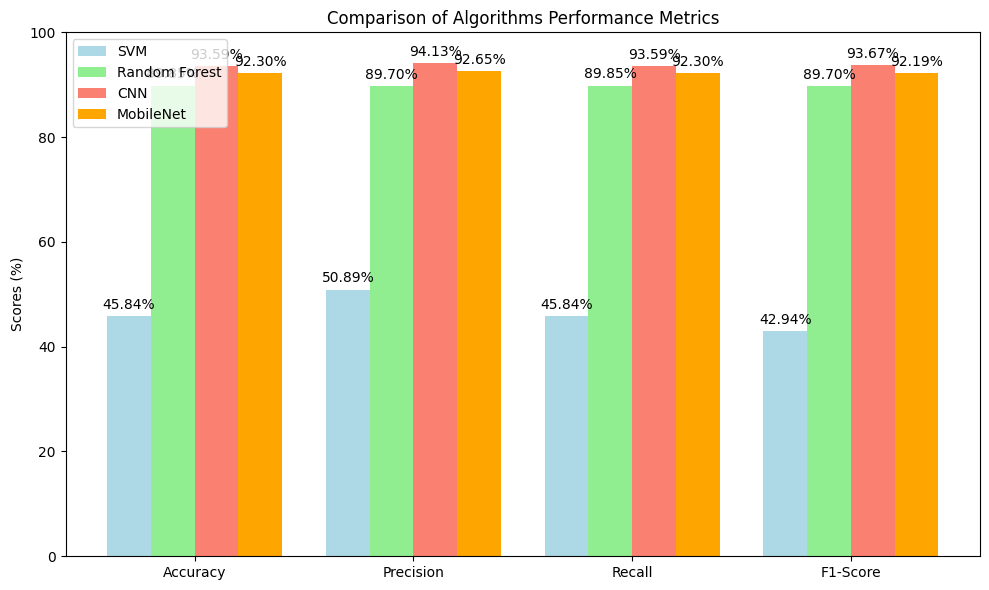

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
svm_scores = [45.84, 50.89, 45.84, 42.94]
rf_scores = [89.85, 89.70, 89.85, 89.70]
cnn_scores = [93.59, 94.13, 93.59, 93.67]
mobilenet_scores = [92.30, 92.65, 92.30, 92.19]

# Set up the bar plot
x = np.arange(len(metrics))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width*1.5, svm_scores, width, label='SVM', color='lightblue')
bars2 = ax.bar(x - width/2, rf_scores, width, label='Random Forest', color='lightgreen')
bars3 = ax.bar(x + width/2, cnn_scores, width, label='CNN', color='salmon')
bars4 = ax.bar(x + width*1.5, mobilenet_scores, width, label='MobileNet', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores (%)')
ax.set_title('Comparison of Algorithms Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add value labels on top of the bars
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.ylim(0, 100)  # Set y-axis limits for better visibility
plt.tight_layout()
plt.show()
